In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

gilgit pk
souillac mu
warqla dz
lebu cl
torbay ca
palmas de monte alto br
batangafo cf
port hardy ca
rikitea pf
nouakchott mr
cape town za
atuona pf
kapaa us
port alfred za
taolanaro mg
palau mx
tonj sd
kachikau bw
lima pe
ampanihy mg
adrar dz
rikitea pf
esperance au
narsaq gl
mayo ca
busselton au
gornopravdinsk ru
tomatlan mx
hobart au
khatanga ru
castro cl
harper lr
bluff nz
flinders au
rio gallegos ar
mar del plata ar
torbay ca
tsihombe mg
new norfolk au
vaini to
cherskiy ru
channel-port aux basques ca
butaritari ki
hobart au
qaanaaq gl
kavaratti in
ostrovnoy ru
port alfred za
atuona pf
kodiak us
bunia cd
rikitea pf
longyearbyen sj
lorengau pg
lima pe
abha sa
puerto rondon co
punta arenas cl
luganville vu
busselton au
busselton au
illoqqortoormiut gl
ushuaia ar
kolno pl
malvern us
taolanaro mg
albany au
daru pg
kapaa us
tuktoyaktuk ca
tiksi ru
vaitupu wf
saint-philippe re
turochak ru
vaini to
terrace ca
mopti ml
muzhi ru
port elizabeth za
eureka us
leningradskiy ru
hilo us
katherine

hilo us
le mars us
georgetown sh
bluff nz
seoul kr
puerto ayora ec
san rafael ar
salinopolis br
cape town za
rikitea pf
charters towers au
mahebourg mu
rikitea pf
ancud cl
wilmington us
anadyr ru
hobyo so
cherskiy ru
sitio novo do tocantins br
preston us
bembereke bj
pueblo nuevo pe
tungkang tw
hithadhoo mv
imeni poliny osipenko ru
ostersund se
morant bay jm
coruripe br
rikitea pf
dikson ru
juneau us
santo angelo br
college us
najran sa
hobyo so
puerto ayora ec
ozernovskiy ru
kloulklubed pw
buzuluk ru
saint-pierre pm
nyurba ru
dikson ru
vila velha br
havre-saint-pierre ca
opuwo na
east london za
saint-augustin ca
yellowknife ca
roma au
jardim br
georgetown sh
vaini to
amderma ru
kapaa us
nome us
ushuaia ar
bluff nz
lebu cl
vaini to
nuuk gl
ushuaia ar
tiznit ma
flinders au
bluff nz
palafrugell es
bredasdorp za
rikitea pf
bilma ne
amderma ru
ushuaia ar
azimur ma
esperance au
attawapiskat ca
manta ec
port alfred za
santiago del estero ar
ushuaia ar
samusu ws
langenburg ca
mergui mm
tres a

harper lr
bilibino ru
khatanga ru
araguacu br
carnarvon au
labuhan id
leshukonskoye ru
kislyakovskaya ru
mastic beach us
ushuaia ar
thompson ca
esperance au
grand river south east mu
qaanaaq gl
rudbar af
alihe cn
provideniya ru
lebu cl
louisbourg ca
hithadhoo mv
yellowknife ca
karkaralinsk kz
puerto ayora ec
atuona pf
pochutla mx
beringovskiy ru
hilo us
moorhead us
sentyabrskiy ru
atuona pf
mtambile tz
bambous virieux mu
yellowknife ca
maksatikha ru
diamantino br
albany au
hirara jp
kandrian pg
dali cn
gat ly
new norfolk au
cuamba mz
jamestown sh
busselton au
altay cn
butaritari ki
bambous virieux mu
cape town za
kapaa us
la libertad sv
khatanga ru
vila franca do campo pt
aswan eg
vaini to
tumannyy ru
mar del plata ar
barentsburg sj
ushuaia ar
dawei mm
port alfred za
hithadhoo mv
torbay ca
hilo us
busselton au
bredasdorp za
khatanga ru
bredasdorp za
rikitea pf
kawalu id
ushuaia ar
mar del plata ar
new norfolk au
attawapiskat ca
hasaki jp
pisco pe
shache cn
jamestown sh
barrow us
okhots

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# import the datetime module from the datetime library.
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gilgit
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | warqla
City not found. Skipping...
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | palmas de monte alto
Processing Record 7 of Set 1 | batangafo
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | nouakchott
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | palau
Processing Record 17 of Set 1 | tonj
Processing Record 18 of Set 1 | kachikau
City not found. Skipping...
Processing Record 19 of Set 1 | lima
Processing Record 20 of Set 1 | ampanihy
Processing Record 21 of Set 1 | adrar
Processing R

Processing Record 38 of Set 4 | douglas
Processing Record 39 of Set 4 | nieuw amsterdam
Processing Record 40 of Set 4 | dayong
Processing Record 41 of Set 4 | umm jarr
City not found. Skipping...
Processing Record 42 of Set 4 | batagay
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | petrovskoye
Processing Record 47 of Set 4 | banikoara
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | tevaitoa
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | twin falls
Processing Record 3 of Set 5 | nabire
Processing Record 4 of Set 5 | jumla
Processing Record 5 of Set 5 | ferkessedougou
Processing Record 6 of Set 5 | kushiro
Processing Record 7 of Set 5 | salta
Processing Record 8 of Set 5 | mandera
Processing Record 9 of Set 5 | taltal
Processing Record 10 of Set 5 | vestmannaeyjar
Proce

Processing Record 27 of Set 8 | vila velha
Processing Record 28 of Set 8 | havre-saint-pierre
Processing Record 29 of Set 8 | saint-augustin
Processing Record 30 of Set 8 | roma
Processing Record 31 of Set 8 | jardim
Processing Record 32 of Set 8 | nuuk
Processing Record 33 of Set 8 | tiznit
Processing Record 34 of Set 8 | palafrugell
Processing Record 35 of Set 8 | azimur
City not found. Skipping...
Processing Record 36 of Set 8 | manta
Processing Record 37 of Set 8 | santiago del estero
Processing Record 38 of Set 8 | langenburg
Processing Record 39 of Set 8 | mergui
City not found. Skipping...
Processing Record 40 of Set 8 | tres arroyos
Processing Record 41 of Set 8 | saleaula
City not found. Skipping...
Processing Record 42 of Set 8 | ballina
Processing Record 43 of Set 8 | puerto escondido
Processing Record 44 of Set 8 | bluefield
Processing Record 45 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 4

Processing Record 14 of Set 12 | lawrenceburg
Processing Record 15 of Set 12 | tabou
Processing Record 16 of Set 12 | ayios petros
City not found. Skipping...
Processing Record 17 of Set 12 | noumea
Processing Record 18 of Set 12 | coutances
Processing Record 19 of Set 12 | pafos
Processing Record 20 of Set 12 | ilulissat
Processing Record 21 of Set 12 | kashi
Processing Record 22 of Set 12 | barcelos
Processing Record 23 of Set 12 | grand centre
City not found. Skipping...
Processing Record 24 of Set 12 | lompoc
Processing Record 25 of Set 12 | bad schwartau
Processing Record 26 of Set 12 | yerazgavors
Processing Record 27 of Set 12 | santa maria
Processing Record 28 of Set 12 | sorvag
City not found. Skipping...
Processing Record 29 of Set 12 | boddam
Processing Record 30 of Set 12 | weyburn
Processing Record 31 of Set 12 | sumenep
Processing Record 32 of Set 12 | dalby
Processing Record 33 of Set 12 | araguacu
Processing Record 34 of Set 12 | leshukonskoye
Processing Record 35 of Se

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gilgit,35.9221,74.3087,63.28,43,100,2.53,PK,2022-04-09 02:04:04
1,Souillac,-20.5167,57.5167,77.34,83,68,13.40,MU,2022-04-09 02:01:26
2,Lebu,-37.6167,-73.6500,52.65,90,3,5.64,CL,2022-04-09 02:04:05
3,Torbay,47.6666,-52.7314,30.76,89,75,9.22,CA,2022-04-09 01:57:20
4,Palmas De Monte Alto,-14.2672,-43.1619,74.25,39,0,5.66,BR,2022-04-09 02:04:05
5,Batangafo,7.3008,18.2833,75.43,73,97,5.68,CF,2022-04-09 02:04:05
6,Port Hardy,50.6996,-127.4199,43.07,78,45,17.25,CA,2022-04-09 02:04:06
7,Rikitea,-23.1203,-134.9692,79.45,74,11,16.60,PF,2022-04-09 02:04:06
8,Nouakchott,18.0858,-15.9785,71.53,60,2,12.28,MR,2022-04-09 01:57:23
9,Cape Town,-33.9258,18.4232,59.92,70,0,11.99,ZA,2022-04-09 02:00:59


In [12]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gilgit,PK,2022-04-09 02:04:04,35.9221,74.3087,63.28,43,100,2.53
1,Souillac,MU,2022-04-09 02:01:26,-20.5167,57.5167,77.34,83,68,13.40
2,Lebu,CL,2022-04-09 02:04:05,-37.6167,-73.6500,52.65,90,3,5.64
3,Torbay,CA,2022-04-09 01:57:20,47.6666,-52.7314,30.76,89,75,9.22
4,Palmas De Monte Alto,BR,2022-04-09 02:04:05,-14.2672,-43.1619,74.25,39,0,5.66
...,...,...,...,...,...,...,...,...,...
571,Acajutla,SV,2022-04-09 02:19:34,13.5928,-89.8275,82.63,74,100,7.20
572,Turtas,RU,2022-04-09 02:19:35,58.9417,69.1325,22.87,89,47,2.28
573,Mandan,US,2022-04-09 02:17:41,46.8267,-100.8896,46.81,30,0,5.75
574,Urumqi,CN,2022-04-09 02:16:28,43.8010,87.6005,56.35,51,0,4.47


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

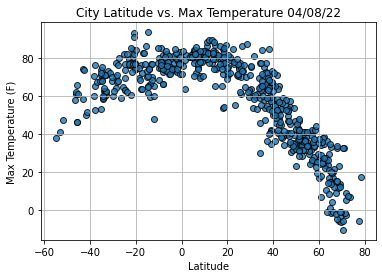

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

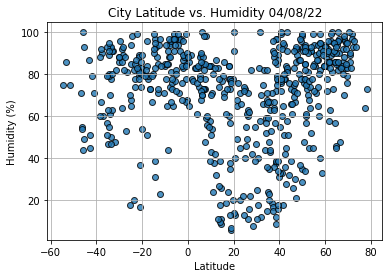

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

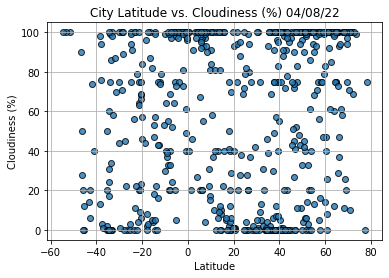

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

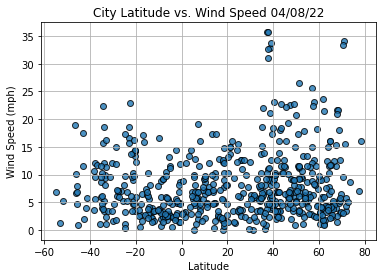

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


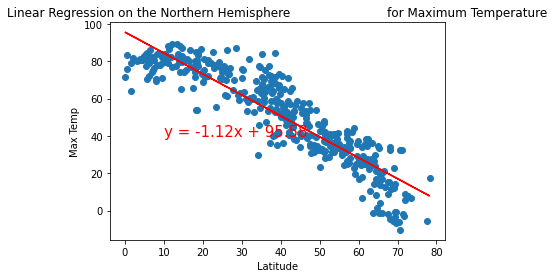

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

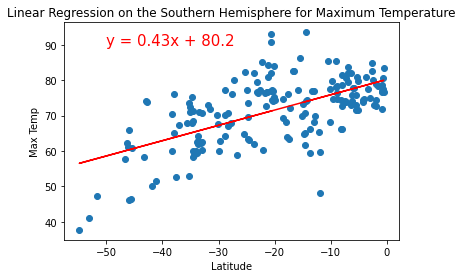

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

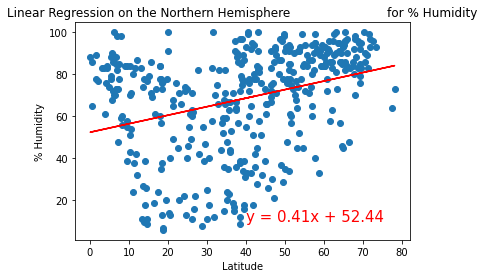

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

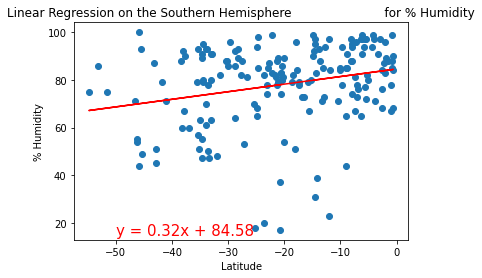

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

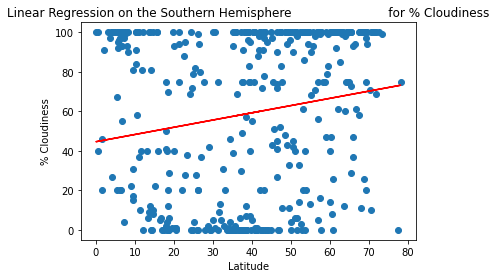

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

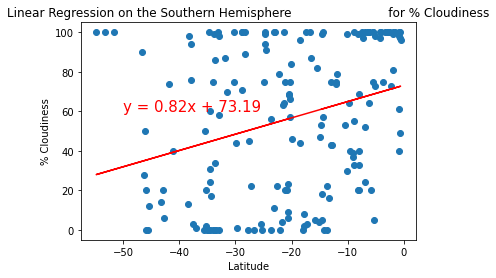

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

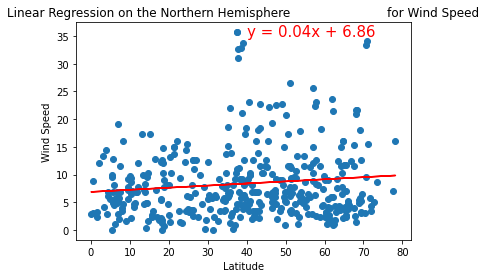

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

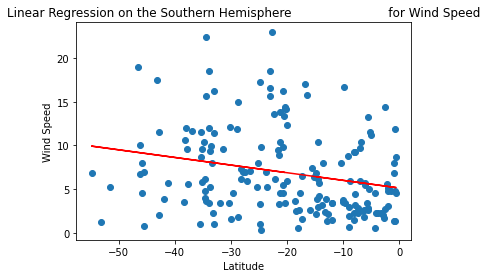

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))